In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.245643248834625 160.47758273621167
78.75625106028892 157.85954500362982
71.2865203394093 130.03663641444808
-89.5768615461536 -57.85953438338382
-14.666492828293855 -66.20099969154762
-4.645280505261709 99.3571301833328
43.61716367683482 -154.3799726507495
67.20489019973462 47.04646472054026
-74.62066480127797 52.63925187170338
47.91391443246411 -168.3116475567511
-46.51231187626509 77.53167306907403
87.3674917981086 12.82695259455997
-24.612744305798984 -127.47623009894473
-49.40749388229593 -37.28481580936659
53.11123981186316 -168.89256799618664
65.718100970367 32.29533338841239
-22.332018523321977 -65.58436442472447
63.709795218035595 177.44330149689438
-36.57348709343112 145.6859152836526
23.343522250895774 81.97432387845214
-44.98277587044372 158.53485303129008
86.38776495219864 -77.75692514763834
-66.4854952551896 39.6774954705202
-63.286760733887355 164.76185615480244
-49.45806323549189 -30.88658160568923
38.237694375338066 -159.6612067141525
46.461905858286826 164.67918245

22.208159976902806 73.66794257559937
-44.88745538256849 10.054772740632586
-22.43200418833139 25.592279704171546
-3.5223644562315286 -127.15324875798623
-15.633072200196054 24.66021218491136
-33.562289369135 110.11680318693567
61.546321375423446 51.14545939340036
48.65714571882714 52.470375088438004
-70.03472680660184 -3.953131117783869
-64.35187019897512 19.696851017207962
-19.50095926637509 64.96421980846725
-51.55219934152358 -40.938803716666314
12.253078721879646 145.67508521149932
73.4463001057089 148.45956063065688
-45.8753957456758 -127.07461063032741
-14.788685543643268 -119.46962454890908
-75.91234399310487 -121.59286564533897
-16.64434943651844 22.31115922925909
-69.55116957742976 -87.6156876376756
-66.38524783182251 102.12241697134499
87.73182826079801 7.360096529005091
-62.23910982397236 -131.16716396021744
34.63396983727182 72.27124381025811
-31.840166392185964 -112.47715779722253
-63.04980749228845 -58.179199002699846
37.28709900054308 6.742960737194636
67.85765497295486 

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# Map out, at a high level, how we will get the weather data for 
# each city for the website.

#1 Import our dependencies and initialize counters and an empty list that will hold the weather data.
#2 Loop through the cities list.
#3 Group the cities in sets of 50 to log the process as we find the weather data for each city.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4 Build the city_url or endpoint for each city.
#5 Log the URL and the record and set numbers.
#6 Make an API request for each city.
#7 Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
#8 Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | koumac
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | san borja
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | leshukonskoye
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | loukhi
Processing Record 16 of Set 1 | villazon
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | benalla
Processing Record 19 of Set 1 | kotma
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | bluff
Processing Record 24 of Set 1 | cidreira
Processin

Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | cove
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | mehriz
Processing Record 46 of Set 4 | guanica
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | kiunga
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | karagay
Processing Record 2 of Set 5 | akyab
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | muhos
Processing Record 5 of Set 5 | nhulunbuy
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | kholtoson
Processing Record 8 of Set 5 | sibolga
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | kathu
Processing Record 11 of Set 5 | kisangani
Processing Record 12 of Set 5 | nantucket
Processing Record 13 of Set 5 | esperance
Pr

Processing Record 33 of Set 8 | bambanglipuro
Processing Record 34 of Set 8 | olga
Processing Record 35 of Set 8 | sao sebastiao
Processing Record 36 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 37 of Set 8 | katsuura
Processing Record 38 of Set 8 | sitka
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | senno
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | nardaran
Processing Record 45 of Set 8 | dahuk
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | arroyo
Processing Record 48 of Set 8 | uglegorskiy
Processing Record 49 of Set 8 | tahoua
Processing Record 50 of Set 8 | konitsa
Processing Record 1 of Set 9 | pangody
Processing Record 2 of Set 9 | moron
Processing Record 3 of Set 9 | khudumelapye
Processing Record 4 of Set 9 | altay
Processing Record 5 

Processing Record 20 of Set 12 | kidal
Processing Record 21 of Set 12 | ayer itam
City not found. Skipping...
Processing Record 22 of Set 12 | sibiti
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | maki
Processing Record 25 of Set 12 | nizwa
Processing Record 26 of Set 12 | chongwe
Processing Record 27 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | shingu
Processing Record 30 of Set 12 | eureka
Processing Record 31 of Set 12 | smiths falls
Processing Record 32 of Set 12 | ahuimanu
Processing Record 33 of Set 12 | kawalu
Processing Record 34 of Set 12 | turukhansk
Processing Record 35 of Set 12 | viligili
City not found. Skipping...
Processing Record 36 of Set 12 | isabela
Processing Record 37 of Set 12 | constitucion
Processing Record 38 of Set 12 | tautira
Processing Record 39 of Set 12 | itacoatiara
Processing Record 40 of Set 12 | novobirilyussy
Processing Record 41 of Set 12 | adrar
Pr

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Koumac,-20.5667,164.2833,69.28,77,19,4.29,NC,2022-08-13 14:40:44
1,Cherskiy,68.7500,161.3000,35.85,82,57,8.16,RU,2022-08-13 14:40:44
2,Tiksi,71.6872,128.8694,38.91,90,80,12.37,RU,2022-08-13 14:40:44
3,Ushuaia,-54.8000,-68.3000,35.26,75,20,5.75,AR,2022-08-13 14:40:45
4,San Borja,-14.8167,-66.8500,84.49,52,11,5.91,BO,2022-08-13 14:40:45
5,Bengkulu,-3.8004,102.2655,76.57,90,100,4.43,ID,2022-08-13 14:40:46
6,Kodiak,57.7900,-152.4072,53.11,94,100,9.22,US,2022-08-13 14:40:46
7,Leshukonskoye,64.8989,45.7622,57.42,59,85,10.18,RU,2022-08-13 14:40:47
8,East London,-33.0153,27.9116,54.54,100,75,3.44,ZA,2022-08-13 14:40:47
9,Bethel,41.3712,-73.4140,73.42,57,20,12.66,US,2022-08-13 14:40:47


In [17]:
# Rearrange column order.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Koumac,NC,2022-08-13 14:40:44,-20.5667,164.2833,69.28,77,19,4.29
1,Cherskiy,RU,2022-08-13 14:40:44,68.7500,161.3000,35.85,82,57,8.16
2,Tiksi,RU,2022-08-13 14:40:44,71.6872,128.8694,38.91,90,80,12.37
3,Ushuaia,AR,2022-08-13 14:40:45,-54.8000,-68.3000,35.26,75,20,5.75
4,San Borja,BO,2022-08-13 14:40:45,-14.8167,-66.8500,84.49,52,11,5.91
5,Bengkulu,ID,2022-08-13 14:40:46,-3.8004,102.2655,76.57,90,100,4.43
6,Kodiak,US,2022-08-13 14:40:46,57.7900,-152.4072,53.11,94,100,9.22
7,Leshukonskoye,RU,2022-08-13 14:40:47,64.8989,45.7622,57.42,59,85,10.18
8,East London,ZA,2022-08-13 14:40:47,-33.0153,27.9116,54.54,100,75,3.44
9,Bethel,US,2022-08-13 14:40:47,41.3712,-73.4140,73.42,57,20,12.66


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1660406430.071147

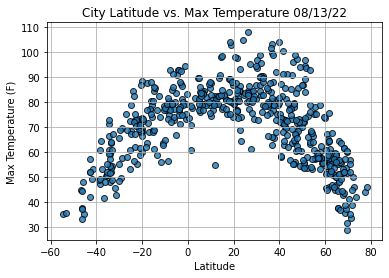

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

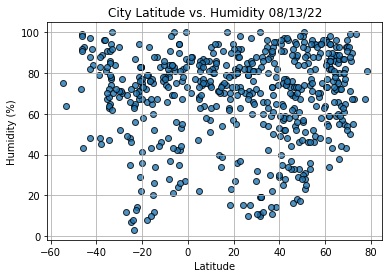

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

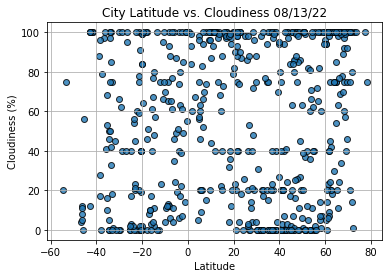

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

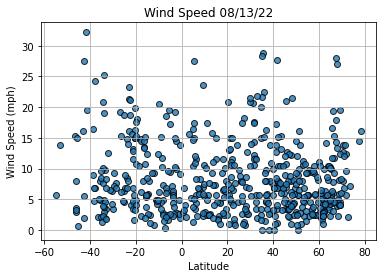

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()